In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.efficientnet import preprocess_input


In [3]:
train_dir='/kaggle/input/butterfly-images40-species/train'
validate_dir='/kaggle/input/butterfly-images40-species/valid'
test_dir='/kaggle/input/applai-cv-st23-assignment-3'

In [4]:
batch_size = 28
image_size = (224, 224)

train_imagenerator = ImageDataGenerator(rescale=1.0/255)


train_imagenerator = ImageDataGenerator(
    rescale=1.0/255,
)

train_gen = image_dataset_from_directory(
    train_dir,
    seed=45,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)


val_gen = image_dataset_from_directory(
    validate_dir,
    seed=45,
    shuffle=False,
    image_size=image_size,
    batch_size=batch_size
)

test_gen = image_dataset_from_directory(
    test_dir,
    seed =45,
    shuffle = False,
    image_size=image_size,
    batch_size=batch_size
)

Found 12594 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 1 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import ResNet50

input_shape = (224, 224, 3)

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape,
    pooling='avg'
)
for layer in base_model.layers[:100]:
    layer.trainable = False
x = layers.Dropout(0.5)(base_model.output)

num_classes = 100  
output = layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
historyyyy = model.fit(
      train_gen,
      epochs=10,
      validation_data=val_gen,
      )

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


450/450 [==============================] - 95s 155ms/step - loss: 1.2994 - accuracy: 0.6881 - val_loss: 0.9158 - val_accuracy: 0.8400
Epoch 2/10
450/450 [==============================] - 68s 151ms/step - loss: 0.3515 - accuracy: 0.9001 - val_loss: 0.4767 - val_accuracy: 0.8900
Epoch 3/10
450/450 [==============================] - 70s 155ms/step - loss: 0.1762 - accuracy: 0.9481 - val_loss: 0.3626 - val_accuracy: 0.9320
Epoch 4/10
450/450 [==============================] - 71s 157ms/step - loss: 0.0871 - accuracy: 0.9729 - val_loss: 0.3135 - val_accuracy: 0.9400
Epoch 5/10
450/450 [==============================] - 71s 158ms/step - loss: 0.0504 - accuracy: 0.9856 - val_loss: 0.3072 - val_accuracy: 0.9440
Epoch 6/10
450/450 [==============================] - 72s 159ms/step - loss: 0.0288 - accuracy: 0.9917 - val_loss: 0.2849 - val_accuracy: 0.9520
Epoch 7/10
450/450 [==============================] - 72s 159ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.3522 - val_accuracy: 0.9

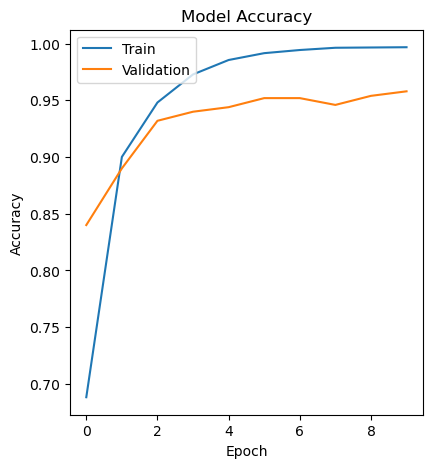

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historyyyy.history['accuracy'])
plt.plot(historyyyy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

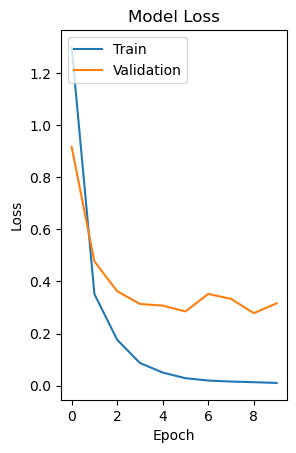

In [7]:
plt.subplot(1, 2, 2)
plt.plot(historyyyy.history['loss'])
plt.plot(historyyyy.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [8]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

test_filenames = []
for root, dirs, files in os.walk(test_dir):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            test_filenames.append(os.path.join(root, filename))

            class_labels = sorted(os.listdir(train_dir))
ids = []
predictions = []

for img_path in test_filenames:
    img_name = os.path.basename(img_path)  # Extract only the image name
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    
    ids.append("test"+fr"\{''}" + img_name)  # Use raw string literal
    predictions.append(predicted_class)

# Create a DataFrame and save it to a CSV file
results_df = pd.DataFrame({'ID': ids, 'Prediction': predictions})
results_df.to_csv('predictions.csv', index=False)

1/1 [==============================] - 0s 22ms/step
